pip install xmltodict

In [2]:
import json
import requests
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt

service_key ='gZ1mis9Xa%2FvXgaEyc0FxYyZ7QvEq1u5WTu4U5thsna%2Bbp3lNV0RztdYSw%2FIuvOIZkJWjETFZRUMG%2FcpQuJgHwA%3D%3D'
request_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey=gZ1mis9Xa%2FvXgaEyc0FxYyZ7QvEq1u5WTu4U5thsna%2Bbp3lNV0RztdYSw%2FIuvOIZkJWjETFZRUMG%2FcpQuJgHwA%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200310&endCreateDt=20200414&'


res = requests.get(request_url)
res.text

'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><confCase>132</confCase><confCaseRate>1.25</confCaseRate><createDt>2020-04-14 10:24:23.23</createDt><criticalRate>0</criticalRate><death>0</death><deathRate>0.00</deathRate><gubun>0-9</gubun><seq>145</seq><updateDt></updateDt></item><item><confCase>565</confCase><confCaseRate>5.35</confCaseRate><createDt>2020-04-14 10:24:23.23</createDt><criticalRate>0</criticalRate><death>0</death><deathRate>0.00</deathRate><gubun>10-19</gubun><seq>144</seq><updateDt></updateDt></item><item><confCase>2886</confCase><confCaseRate>27.32</confCaseRate><createDt>2020-04-14 10:24:23.23</createDt><criticalRate>0</criticalRate><death>0</death><deathRate>0.00</deathRate><gubun>20-29</gubun><seq>143</seq><updateDt></updateDt></item><item><confCase>1126</confCase><confCaseRate>10.66</confCaseRate><createDt>2020-04-14 10:24:23.23</createDt><critica

In [6]:
xml_data = xmltodict.parse(res.text)
json_raw = json.dumps(xml_data)
json_data = json.loads(json_raw)

{'confCase': '132', 'confCaseRate': '1.25', 'createDt': '2020-04-14 10:24:23.23', 'criticalRate': '0', 'death': '0', 'deathRate': '0.00', 'gubun': '0-9', 'seq': '145', 'updateDt': None}
{'confCase': '565', 'confCaseRate': '5.35', 'createDt': '2020-04-14 10:24:23.23', 'criticalRate': '0', 'death': '0', 'deathRate': '0.00', 'gubun': '10-19', 'seq': '144', 'updateDt': None}
{'confCase': '2886', 'confCaseRate': '27.32', 'createDt': '2020-04-14 10:24:23.23', 'criticalRate': '0', 'death': '0', 'deathRate': '0.00', 'gubun': '20-29', 'seq': '143', 'updateDt': None}
{'confCase': '1126', 'confCaseRate': '10.66', 'createDt': '2020-04-14 10:24:23.23', 'criticalRate': '0.09', 'death': '1', 'deathRate': '0.45', 'gubun': '30-39', 'seq': '142', 'updateDt': None}
{'confCase': '1405', 'confCaseRate': '13.3', 'createDt': '2020-04-14 10:24:23.23', 'criticalRate': '0.21', 'death': '3', 'deathRate': '1.35', 'gubun': '40-49', 'seq': '141', 'updateDt': None}
{'confCase': '1935', 'confCaseRate': '18.32', 'crea

In [7]:
data = []
for item in json_data['response']['body']['items']['item']:
    data.append(item)

data

[{'confCase': '132',
  'confCaseRate': '1.25',
  'createDt': '2020-04-14 10:24:23.23',
  'criticalRate': '0',
  'death': '0',
  'deathRate': '0.00',
  'gubun': '0-9',
  'seq': '145',
  'updateDt': None},
 {'confCase': '565',
  'confCaseRate': '5.35',
  'createDt': '2020-04-14 10:24:23.23',
  'criticalRate': '0',
  'death': '0',
  'deathRate': '0.00',
  'gubun': '10-19',
  'seq': '144',
  'updateDt': None},
 {'confCase': '2886',
  'confCaseRate': '27.32',
  'createDt': '2020-04-14 10:24:23.23',
  'criticalRate': '0',
  'death': '0',
  'deathRate': '0.00',
  'gubun': '20-29',
  'seq': '143',
  'updateDt': None},
 {'confCase': '1126',
  'confCaseRate': '10.66',
  'createDt': '2020-04-14 10:24:23.23',
  'criticalRate': '0.09',
  'death': '1',
  'deathRate': '0.45',
  'gubun': '30-39',
  'seq': '142',
  'updateDt': None},
 {'confCase': '1405',
  'confCaseRate': '13.3',
  'createDt': '2020-04-14 10:24:23.23',
  'criticalRate': '0.21',
  'death': '3',
  'deathRate': '1.35',
  'gubun': '40-49'

In [9]:
df = pd.DataFrame(data)
df.columns = ['확진자', '확진률', '등록일시분초', '치명률', '사망자', '사망률', '구분', '게시글번호', '수정일시분초']

In [10]:
df.head()

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,게시글번호,수정일시분초
0,132,1.25,2020-04-14 10:24:23.23,0,0,0.00,0-9,145,None
1,565,5.35,2020-04-14 10:24:23.23,0,0,0.00,10-19,144,None
2,2886,27.32,2020-04-14 10:24:23.23,0,0,0.00,20-29,143,None
3,1126,10.66,2020-04-14 10:24:23.23,0.09,1,0.45,30-39,142,None
4,1405,13.3,2020-04-14 10:24:23.23,0.21,3,1.35,40-49,141,None


# 연령별/확진자 수를 나타내는 그래프를 출력하시오.

In [11]:
df['구분'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80 이상', '여성', '남성', '0-11'], dtype=object)

In [12]:
df['등록일시분초']

0      2020-04-14 10:24:23.23
1      2020-04-14 10:24:23.23
2      2020-04-14 10:24:23.23
3      2020-04-14 10:24:23.23
4      2020-04-14 10:24:23.23
                ...          
139    2020-04-02 19:02:48.48
140    2020-04-02 19:02:48.48
141    2020-04-02 19:02:48.48
142    2020-04-02 19:02:48.48
143    2020-04-02 19:02:48.48
Name: 등록일시분초, Length: 144, dtype: object

In [47]:
df['등록일자'] = pd.to_datetime(df['등록일시분초']).dt.strftime('%Y-%m-%d')

In [15]:
df.head()

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,게시글번호,수정일시분초
0,132,1.25,2020-04-14 10:24:23.23,0,0,0.00,0-9,145,None
1,565,5.35,2020-04-14 10:24:23.23,0,0,0.00,10-19,144,None
2,2886,27.32,2020-04-14 10:24:23.23,0,0,0.00,20-29,143,None
3,1126,10.66,2020-04-14 10:24:23.23,0.09,1,0.45,30-39,142,None
4,1405,13.3,2020-04-14 10:24:23.23,0.21,3,1.35,40-49,141,None


In [18]:
df[['확진자', '확진률']] = df[['확진자', '확진률']].apply(pd.to_numeric)

df

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,게시글번호,수정일시분초
0,132,1.25,2020-04-14 10:24:23.23,0,0,0.00,0-9,145,None
1,565,5.35,2020-04-14 10:24:23.23,0,0,0.00,10-19,144,None
2,2886,27.32,2020-04-14 10:24:23.23,0,0,0.00,20-29,143,None
3,1126,10.66,2020-04-14 10:24:23.23,0.09,1,0.45,30-39,142,None
4,1405,13.30,2020-04-14 10:24:23.23,0.21,3,1.35,40-49,141,None
...,...,...,...,...,...,...,...,...,...
139,1235,12.62,2020-04-02 19:02:48.48,1.78,22,13.58,60-69,5,None
140,651,6.65,2020-04-02 19:02:48.48,7.07,46,28.4,70-79,4,None
141,442,4.52,2020-04-02 19:02:48.48,18.55,82,50.62,80 이상,3,None
142,5881,60.10,2020-04-02 19:02:48.48,1.36,80,49.38,여성,2,None


In [21]:
df_inf = df.groupby(['구분'], as_index = False).sum()

In [22]:
df_inf

,구분,확진자,확진률
0,0-11,1,1.00
1,0-9,1649,15.85
2,10-19,7150,68.86
3,20-29,36820,354.53
4,30-39,14319,137.85
5,40-49,18024,173.59
6,50-59,24895,239.75
7,60-69,17063,164.28
8,70-79,8975,86.40
9,80 이상,6108,58.85


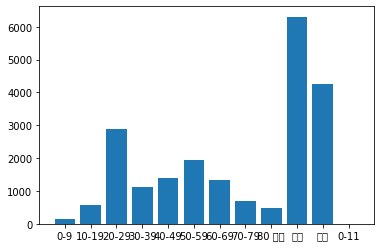

In [26]:
bar_graph = plt.bar(df['구분'], df['확진자'])

In [37]:
# Modifying graph
ageStr = {
    '0-11':'10세 미만',
    '0-9':'10세 미만', 
    '10-19':'10대',
    '20-29':'20대',
    '30-39':'30대',
    '40-49':'40대',
    '50-59':'50대',
    '60-69':'60대',
    '70-79':'70대',
    '80 이상' : '80이상',
    '남성':'남성',
    '여성':'여성'}
ageStr

{'0-11': '10세 미만',
 '0-9': '10세 미만',
 '10-19': '10대',
 '20-29': '20대',
 '30-39': '30대',
 '40-49': '40대',
 '50-59': '50대',
 '60-69': '60대',
 '70-79': '70대',
 '80 이상': '80이상',
 '남성': '남성',
 '여성': '여성'}

In [39]:
df_inf['구분'] = df_inf['구분'].apply(lambda x : ageStr[x.lower()])

KeyError: '10세 미만'

In [40]:
df_inf

,구분,확진자,확진률
0,10세 미만,1,1.00
1,10세 미만,1649,15.85
2,10대,7150,68.86
3,20대,36820,354.53
4,30대,14319,137.85
5,40대,18024,173.59
6,50대,24895,239.75
7,60대,17063,164.28
8,70대,8975,86.40
9,80이상,6108,58.85


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48120 missing from cur

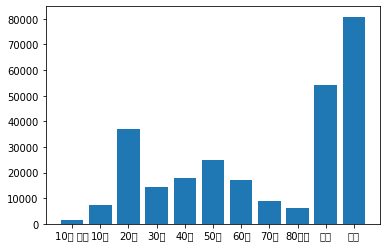

In [42]:
bar_graph = plt.bar(df_inf['구분'], df_inf['확진자'])

# 아래는 교수님 풀이이다.

In [43]:
df['구분'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80 이상', '여성', '남성', '0-11'], dtype=object)

In [45]:
df.head()

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,게시글번호,수정일시분초
0,132,1.25,2020-04-14 10:24:23.23,0,0,0.00,0-9,145,None
1,565,5.35,2020-04-14 10:24:23.23,0,0,0.00,10-19,144,None
2,2886,27.32,2020-04-14 10:24:23.23,0,0,0.00,20-29,143,None
3,1126,10.66,2020-04-14 10:24:23.23,0.09,1,0.45,30-39,142,None
4,1405,13.30,2020-04-14 10:24:23.23,0.21,3,1.35,40-49,141,None


In [48]:
df2 = df[df['등록일자'] == '2020-04-14']
df2

,확진자,확진률,등록일시분초,치명률,사망자,사망률,구분,게시글번호,수정일시분초,등록일자
0,132,1.25,2020-04-14 10:24:23.23,0,0,0.00,0-9,145,None,2020-04-14
1,565,5.35,2020-04-14 10:24:23.23,0,0,0.00,10-19,144,None,2020-04-14
2,2886,27.32,2020-04-14 10:24:23.23,0,0,0.00,20-29,143,None,2020-04-14
3,1126,10.66,2020-04-14 10:24:23.23,0.09,1,0.45,30-39,142,None,2020-04-14
4,1405,13.30,2020-04-14 10:24:23.23,0.21,3,1.35,40-49,141,None,2020-04-14
5,1935,18.32,2020-04-14 10:24:23.23,0.72,14,6.31,50-59,140,None,2020-04-14
6,1338,12.67,2020-04-14 10:24:23.23,2.47,33,14.86,60-69,139,None,2020-04-14
7,700,6.63,2020-04-14 10:24:23.23,9.29,65,29.28,70-79,138,None,2020-04-14
8,477,4.52,2020-04-14 10:24:23.23,22.22,106,47.75,80 이상,137,None,2020-04-14
9,6308,59.71,2020-04-14 10:24:23.23,1.68,106,47.75,여성,136,None,2020-04-14


In [50]:
df3 = df2.iloc[:9, [6,0]]
df3

,구분,확진자
0,0-9,132
1,10-19,565
2,20-29,2886
3,30-39,1126
4,40-49,1405
5,50-59,1935
6,60-69,1338
7,70-79,700
8,80 이상,477


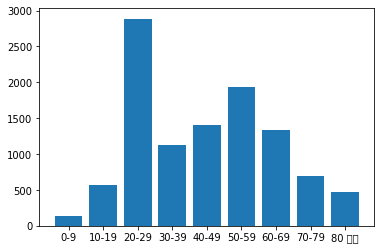

In [51]:
plt.bar(df3['구분'], df3['확진자'].astype(float))
plt.show()